In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
#MLP
from sklearn.neural_network import MLPClassifier
#SVC
from sklearn.svm import SVC
#Random Forest
from sklearn.ensemble import RandomForestClassifier
#XGBoost
import xgboost
from xgboost import XGBClassifier

In [2]:
dname="./DATA/"
str0="_XGB_24.dat"
fnamex=dname+'x'+str0
fnamey=dname+'y'+str0
x = np.loadtxt(fnamex, delimiter=" ",dtype=float)
y = np.loadtxt(fnamey)
y = y.astype(int)
N,L = len(x), len(x[0])

N_train = int(0.75*N)
x_train,y_train = x[:N_train],y[:N_train]
x_test,y_test = x[N_train:],y[N_train:]
print(f"N={N}, N_train={N_train}, L={L}")

N=4000, N_train=3000, L=4


In [3]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [4]:
models = {
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 100), activation='tanh', solver='adam', alpha=0.0001, learning_rate_init=0.01),
    "SVM": SVC(C=100, kernel='rbf', gamma='scale'),
    "RandomForest": RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_split=2, min_samples_leaf=1),
    "XGBoost": XGBClassifier(
        colsample_bytree=1,
        eta=0.3,
        eval_metric='logloss',
        gamma=1.6071428571428572,
        importance_type='gain',
        reg_lambda=0.5555555555555556,
        max_depth=9,
        min_child_weight=1,
        n_estimators=10,
        objective='binary:logistic',
        seed=1,
        subsample=1,
        verbosity=0
    )
}

results = {}
average_times = []
average_time_error = []
average_accs = []
average_accs_error = []

for model_name, model in models.items():
    times = []
    accs = []
    for _ in range (10):
        start_time = time.time()
        model.fit(x_train_scaled, y_train)
        times.append(time.time() - start_time)
        accs.append(accuracy_score(y_test, model.predict(x_test_scaled)))

    avg_time = np.mean(times)
    time_std = np.std(times)
    avg_acc = np.mean(accs)
    acc_std = np.std(accs)

    average_times.append(avg_time)
    average_time_error.append(time_std)
    average_accs.append(avg_acc)
    average_accs_error.append(acc_std)
    
    results[model_name] = {
        "Average Training Time (s)": avg_time,
        "Training Time Std Dev": time_std,
        "Average Accuracy": avg_acc,
        "Accuracy Std Dev": acc_std
    }

results

{'MLP': {'Average Training Time (s)': 2.421494650840759,
  'Training Time Std Dev': 0.4457149049376954,
  'Average Accuracy': 0.9431,
  'Accuracy Std Dev': 0.007272551134230652},
 'SVM': {'Average Training Time (s)': 0.4434658050537109,
  'Training Time Std Dev': 0.0072691192796690155,
  'Average Accuracy': 0.736,
  'Accuracy Std Dev': 0.0},
 'RandomForest': {'Average Training Time (s)': 0.2066159725189209,
  'Training Time Std Dev': 0.0024446207189847374,
  'Average Accuracy': 0.9314,
  'Accuracy Std Dev': 0.004498888751680761},
 'XGBoost': {'Average Training Time (s)': 0.021767473220825194,
  'Training Time Std Dev': 0.003224616641606022,
  'Average Accuracy': 0.946,
  'Accuracy Std Dev': 0.0}}

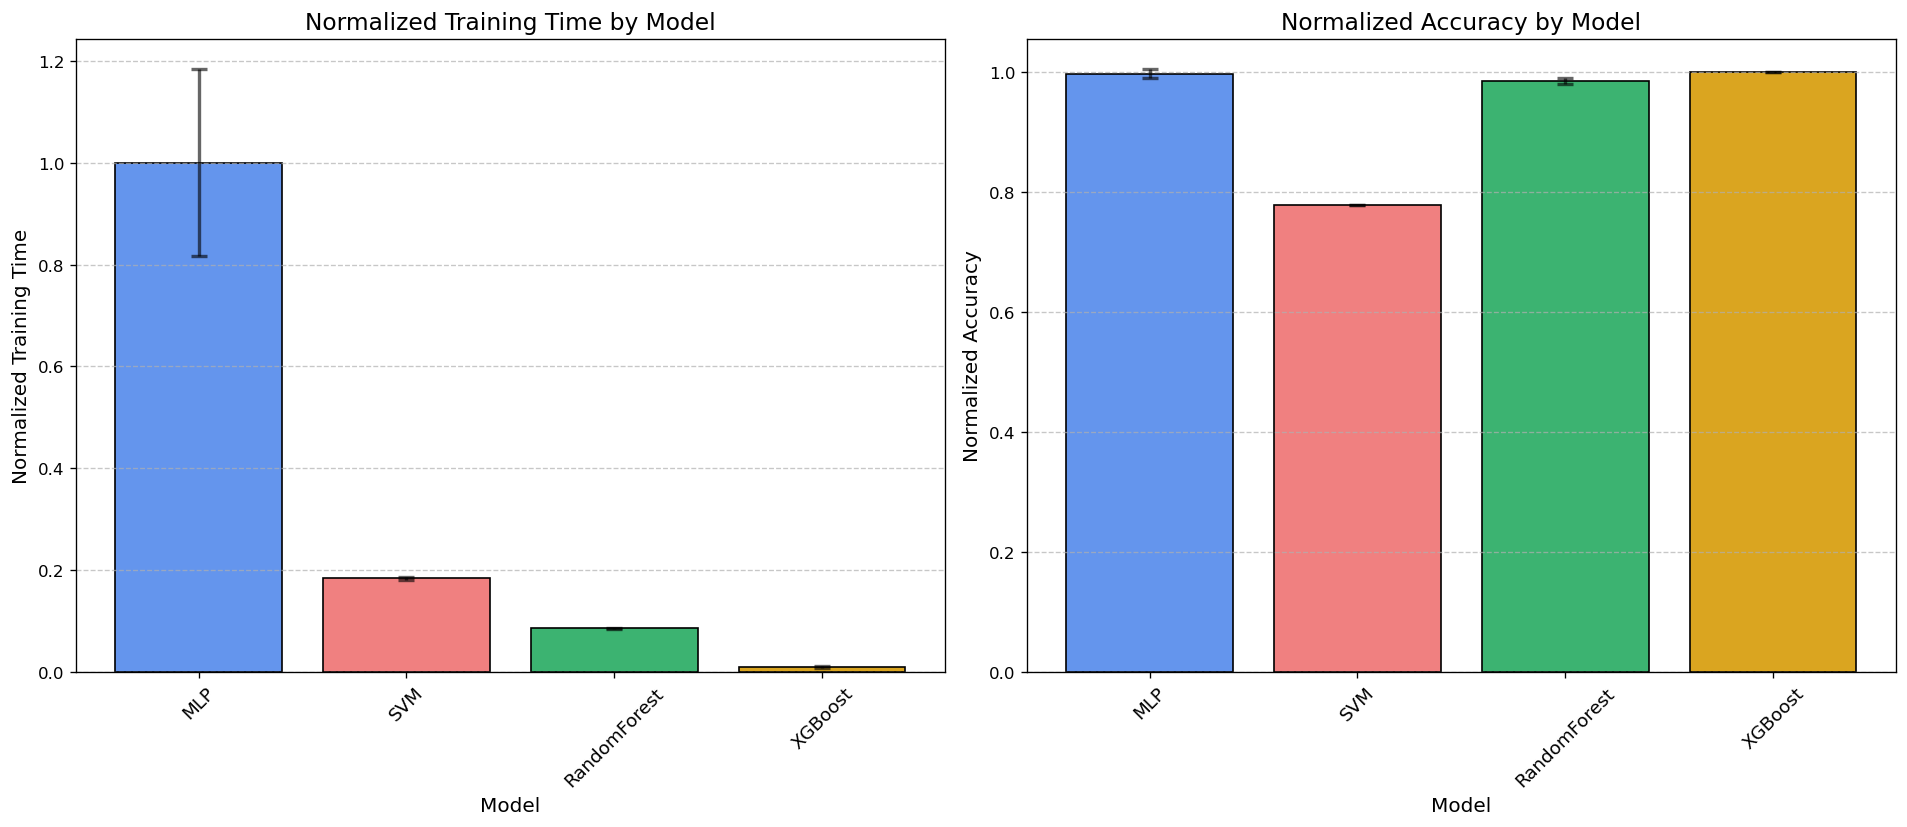

In [8]:
model_names = ["MLP", "SVM", "RandomForest", "XGBoost"]
normalized_times = average_times / np.max(average_times)
normalized_time_errors = average_time_error / np.max(average_times)
normalized_accuracies = average_accs/ np.max(average_accs)
normalized_acc_errors = average_accs_error / np.max(average_accs)

fig, axs = plt.subplots(1, 2, figsize=(16, 7), dpi=120)

bar_colors = ['cornflowerblue', 'lightcoral', 'mediumseagreen', 'goldenrod']
error_kw = {'capsize': 5, 'capthick': 2, 'elinewidth': 2, 'alpha': 0.6}

axs[0].bar(model_names, normalized_times, yerr=normalized_time_errors, color=bar_colors, error_kw=error_kw, edgecolor='black')
axs[0].set_title('Normalized Training Time by Model', fontsize=14)
axs[0].set_xlabel('Model', fontsize=12)
axs[0].set_ylabel('Normalized Training Time', fontsize=12)
axs[0].set_xticks(range(len(model_names)))
axs[0].set_xticklabels(model_names, rotation=45, fontsize=11)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

axs[1].bar(model_names, normalized_accuracies, yerr=normalized_acc_errors, color=bar_colors, error_kw=error_kw, edgecolor='black')
axs[1].set_title('Normalized Accuracy by Model', fontsize=14)
axs[1].set_xlabel('Model', fontsize=12)
axs[1].set_ylabel('Normalized Accuracy', fontsize=12)
axs[1].set_xticks(range(len(model_names)))
axs[1].set_xticklabels(model_names, rotation=45, fontsize=11)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()